In [23]:
# This notebooks compars the distributions of all weather events
# with the weather that occured at given incidents.
#
# Incidents are from TomTom. Weather is from DWD.
#
# It also doubles as gentle intro to how we can use Jupyter/Pandas
# with the data.
#
# Author: Volker Hoffmann <volker@cheleb.net> <hoffmann@stcorp.no>
# Update: 05 September 2016

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib as mpl; mpl.rcParams['savefig.dpi'] = 144
# import matplotlib as mpl; mpl.rcParams['savefig.dpi'] = 72
import matplotlib.pyplot as plt

# Style

First, let's style the figures a bit...

In [4]:
# Pretty Colour Cycle
from cycler import cycler

# E24A33 : red
# 348ABD : blue
# 988ED5 : purple
# 777777 : gray
# FBC15E : yellow
# 8EBA42 : green
# FFB5B8 : pink
cycle_colours = \
    [ '#E24A33', '#348ABD', '#988ED5', \
      '#777777', '#FBC15E', '#8EBA42', \
      '#FFB5B8']


# Set Cycle Colours
mpl.rcParams['axes.prop_cycle'] = cycler('color', cycle_colours)

# Axes Spines & Labels
mpl.rcParams['axes.linewidth'] = 0.5
# mpl.rcParams['axes.axisbelow'] = True       # grid/ticks below elements
mpl.rcParams['axes.axisbelow'] = False       # grid/ticks below elements
mpl.rcParams['xtick.color'] = '#555555'
mpl.rcParams['ytick.color'] = '#555555'
mpl.rcParams['axes.labelcolor'] = '#555555'
# mpl.rcParams['xtick.color'] = '#222222'
# mpl.rcParams['ytick.color'] = '#222222'
# mpl.rcParams['axes.labelcolor'] = '#222222'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
# mpl.rcParams['xtick.direction'] = 'inout'
# mpl.rcParams['ytick.direction'] = 'inout'

# Fonts for PS/PDF Export
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# Serif?
mpl.rcParams['font.family'] = 'serif'

# Lines
mpl.rcParams['lines.linewidth'] = 1.0

# Ticks
mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.minor.size'] = 0

# Font Sizes
mpl.rcParams['xtick.labelsize']  = 'small'
mpl.rcParams['ytick.labelsize']  = 'small'
mpl.rcParams['axes.labelsize']   = 'small'
mpl.rcParams['axes.titlesize']   = 'small'

# Legend
mpl.rcParams['legend.handlelength']  = 1.0
mpl.rcParams['legend.frameon']       = False
mpl.rcParams['legend.numpoints']     = 1
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.fontsize']      = 'small'

# Load  Data

The data is already processed into Pandas dataframes, which are stored wrapped in HDF5 files. So we simply load those dataframes back from these files.

## Traffic/Weather

In [5]:
# Location of Traffic Data
basedir = '/Users/volker/Work_ST/Companion/Data/DE/TrafficWeather_Merged'
# fname = "%s/TrafficWeather_2015_01_04.pddf.hdf5" % basedir
fname = "%s/TrafficWeather_2015_01.pddf.hdf5" % basedir

# Load Traffic Data
df_traffic = pd.read_hdf(fname, 'df')

# Invalid Data Replacements
df_traffic[df_traffic.precipitation_amount<0.0] = np.nan
df_traffic[df_traffic.temperature<-100.0] = np.nan
df_traffic[df_traffic.wind_speed<-1.0] = np.nan
df_traffic[df_traffic.relative_humidity<-100.0] = np.nan

# Kick Out Invalid Data
df_traffic = df_traffic[~np.isnan(df_traffic.temperature_closest_weather_station_id)]

# Only Keep Subset of Stations (Stations with 2.0km of Incident)
# df_traffic = df_traffic[df_traffic.temperature_closest_weather_station_dxdy<2.0]

## Weather

In [6]:
# Location of Weather Data
basedir = '/Users/volker/Work_ST/Companion/Data/DE/WeatherReduced'

# Load Temperature Data, Remove Bad Fields
df_obs_temp = pd.read_hdf("%s/weather_obs_temperature.pddf.hdf5" % basedir, 'df')
df_obs_temp[df_obs_temp.temperature<-100.0] = np.nan
df_obs_temp[df_obs_temp.relative_humidity<-100.0] = np.nan

# Rain Data
df_obs_rain = pd.read_hdf("%s/weather_obs_precipitation.pddf.hdf5" % basedir, 'df')
df_obs_rain[df_obs_rain.precipitation_amount<-0.01] = np.nan

# Filter Day/Month
df_obs_temp = \
    df_obs_temp[(df_obs_temp.timestamp  < pd.to_datetime("2015020100", format="%Y%m%d%H")) & \
                (df_obs_temp.timestamp >= pd.to_datetime("2015010100", format="%Y%m%d%H"))]

df_obs_rain = \
    df_obs_rain[(df_obs_rain.timestamp  < pd.to_datetime("2015020100", format="%Y%m%d%H")) & \
                (df_obs_rain.timestamp >= pd.to_datetime("2015010100", format="%Y%m%d%H"))]

# Basic Pandas Foo

Let's do some basic viewing and slicing of Pandas dataframes.

In [7]:
# Indexing Pandas dataframes works like accessing dicts, i.e. by keys
df_traffic.keys()

Index([u'situation_id', u'event_type', u'event_code', u'location_lat_decimal',
       u'timestamp', u'location_lon_decimal', u'average_speed',
       u'location_openlr_base64', u'timestamp_seconds',
       u'precipitation_closest_weather_station_id',
       u'precipitation_closest_weather_station_dxdy',
       u'temperature_closest_weather_station_id',
       u'temperature_closest_weather_station_dxdy',
       u'wind_closest_weather_station_id',
       u'wind_closest_weather_station_dxdy', u'precipitation_dt',
       u'precipitation', u'precipitation_amount', u'precipitation_kind',
       u'temperature_dt', u'temperature', u'relative_humidity', u'wind_dt',
       u'wind_speed', u'wind_direction'],
      dtype='object')

In [8]:
# Shows the first row of the data
# .T transposes
df_traffic.head(1).T

,0
situation_id,TTI-c5bc2b46-ced0-49a7-bd63-2435fbd264b1-TTL13...
event_type,queueingTraffic
event_code,108
location_lat_decimal,47.692
timestamp,2015-01-02 11:11:28
location_lon_decimal,9.83313
average_speed,7
location_openlr_base64,Cwb+EiHqRyOQBP///xcjAw==
timestamp_seconds,1.4202e+09
precipitation_closest_weather_station_id,7382


In [9]:
# Shows only some of the columns
# .head(5) shows the first 5 rows only
df_traffic[['event_type', 'timestamp', 'temperature', \
            'relative_humidity', 'temperature_closest_weather_station_dxdy']].head(5)

,event_type,timestamp,temperature,relative_humidity,temperature_closest_weather_station_dxdy
0,queueingTraffic,2015-01-02 11:11:28,-0.3,100.0,14.494565
1,stationaryTraffic,2015-01-02 11:12:28,6.2,78.0,10.477398
2,stationaryTraffic,2015-01-02 11:11:28,8.1,72.0,6.008940
3,queueingTraffic,2015-01-02 11:12:28,5.0,76.0,8.148218
4,queueingTraffic,2015-01-02 11:11:58,2.4,91.0,7.180590


In [10]:
# Filter by a humidity range (these give booleans, which we are used
# to index the dataframe) -- much like in Numpy.
# 
# We also store this into a new dataframe. 
df_tmp = df_traffic[(df_traffic.relative_humidity>90.0) & \
                    (df_traffic.relative_humidity<=95.0)].head(1000)

# Keep only some columns
df_tmp = df_tmp[['timestamp', 'relative_humidity', 'temperature']]

# Sort by relative humidity (descending), then show only the first 5 rows
df_tmp.sort_values(by='relative_humidity', ascending=False).head(5)

,timestamp,relative_humidity,temperature
1415,2015-01-02 08:53:10,95.0,-5.9
1236,2015-01-02 10:15:29,95.0,5.0
1269,2015-01-02 09:58:22,95.0,3.4
1253,2015-01-02 09:52:50,95.0,-2.7
1248,2015-01-02 10:16:59,95.0,7.0


In [11]:
# .describe() computes some basic stats
df_tmp.describe()

,relative_humidity,temperature
count,1000.000,1000.000000
mean,93.075,2.446000
std,1.351,3.434784
min,91.000,-11.100000
25%,92.000,0.700000
50%,93.000,2.500000
75%,94.000,3.900000
max,95.000,8.500000


In [12]:
# You can .apply a function to a dataframe. This is usually faster than looping.
df_tmp['hello'] = df_tmp.apply(lambda x: x['relative_humidity'] + x['temperature'], axis=1)

In [13]:
# Let's what we've done
df_tmp.head(5)

,timestamp,relative_humidity,temperature,hello
4,2015-01-02 11:11:58,91.0,2.4,93.4
5,2015-01-02 11:11:28,93.0,6.7,99.7
17,2015-01-02 11:12:28,95.0,2.8,97.8
18,2015-01-02 11:12:28,93.0,4.6,97.6
22,2015-01-02 11:12:28,93.0,0.4,93.4


# Show Histgrams of Weather vs Weather@Incidents

Let's have a look at histograms of weather conditions for all weather, for the weather at all incidents, as well as for the weather at incidents that only have a measurement station within some prescribed distance.

## Relative Humidity

In [14]:
# Build Histogram
data_list = \
    [ df_obs_temp.relative_humidity, \
      df_traffic.relative_humidity, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<1.0].relative_humidity, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<0.5].relative_humidity, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<0.1].relative_humidity ]

for idata, data_loc in enumerate(data_list):
    data_list[idata] = data_loc[~np.isnan(data_loc)]

bin_edges = np.linspace(0,100,64)
bin_cents = (bin_edges[1:] + bin_edges[:-1]) / 2.0

hist_list = []
for idata, data_loc in enumerate(data_list):
    hist_loc, _ = np.histogram(data_loc, bins=bin_edges)
    hist_list.append(hist_loc)

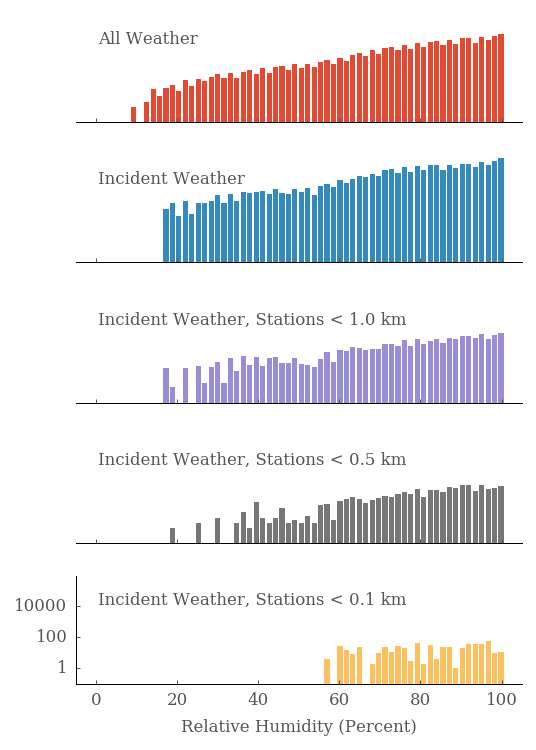

In [15]:
# Text
tags = [ 'All Weather', 'Incident Weather', \
         'Incident Weather, Stations < 1.0 km', \
         'Incident Weather, Stations < 0.5 km', \
         'Incident Weather, Stations < 0.1 km']

# Setup Figure
fig, axarr = plt.subplots(5,1) # <<< 5 vertical panels, 1 horizonal panel
fig.set_size_inches(4,6)

# Loo Papnels
for iax in [ 0, 1, 2, 3, 4 ]:
    axarr[iax].bar(bin_cents, \
                   hist_list[iax], \
                   width=0.8*(np.diff(bin_cents)[0]), \
                   facecolor=cycle_colours[iax], linewidth=0.0)
    axarr[iax].text(0.05, 0.85, "%s" % tags[iax], \
                    ha='left', va='top', \
                    transform=axarr[iax].transAxes, \
                    fontsize='small', \
                    color='#555555')

# Set Scale (lin/log) and Limits
for ax in axarr:
    ax.set_yscale('log')
    ax.set_xlim([-5,105])
    ax.set_ylim([0.1,1.0e6])

# Remove Spines (Left/Top/Right)
for ax in axarr.flatten():
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
#     ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0,20,40,60,80,100])

# Remove and Flush Ticks
for ax in axarr.flatten()[:-1]:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.set_xticklabels(['','','','', '',''])

# Set Labels, Bottom Panel
axarr[-1].set_xlabel('Relative Humidity (Percent)')
axarr[-1].set_yticks([1,100,10000])
axarr[-1].set_yticklabels(['1','100','10000'])
    
# Adjust Horizontal Spacing
fig.subplots_adjust(hspace=0.3)

# Save Figure
# fig.savefig('weather_filtered_by_station_distance_humidity.png')

## Temperature

In [16]:
# Build Histogram
data_list = \
    [ df_obs_temp.temperature, \
      df_traffic.temperature, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<1.0].temperature, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<0.5].temperature, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<0.1].temperature ]

for idata, data_loc in enumerate(data_list):
    data_list[idata] = data_loc[~np.isnan(data_loc)]

bin_edges = np.linspace(-20,30,64)
bin_cents = (bin_edges[1:] + bin_edges[:-1]) / 2.0

hist_list = []
for idata, data_loc in enumerate(data_list):
    hist_loc, _ = np.histogram(data_loc, bins=bin_edges)
    hist_list.append(hist_loc)

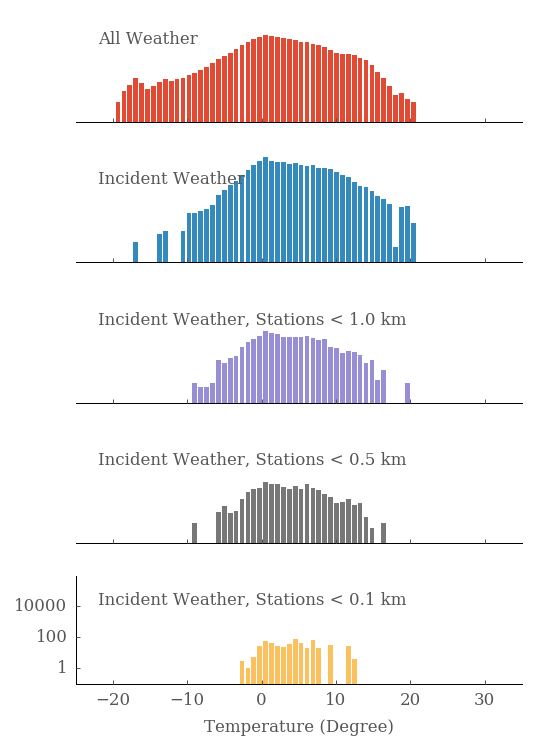

In [17]:
# Text
tags = [ 'All Weather', 'Incident Weather', \
         'Incident Weather, Stations < 1.0 km', \
         'Incident Weather, Stations < 0.5 km', \
         'Incident Weather, Stations < 0.1 km']

fig, axarr = plt.subplots(5,1)
fig.set_size_inches(4,6)

for iax in [ 0, 1, 2, 3, 4 ]:
#     axarr[iax].bar(bin_cents, \
#                    hist_list[iax] / float(hist_list[iax].max()), \
#                    width=0.8*(np.diff(bin_cents)[0]), \
#                    facecolor=cycle_colours[iax], linewidth=0.0)
    axarr[iax].bar(bin_cents, \
                   hist_list[iax], \
                   width=0.8*(np.diff(bin_cents)[0]), \
                   facecolor=cycle_colours[iax], linewidth=0.0)
    axarr[iax].text(0.05, 0.85, "%s" % tags[iax], \
                    ha='left', va='top', \
                    transform=axarr[iax].transAxes, \
                    fontsize='small', \
                    color='#555555')

for ax in axarr:
    ax.set_yscale('log')
    ax.set_xlim([-25,35])
#     ax.set_ylim([1.0e-4,1.0e1])
    ax.set_ylim([0.1,1.0e6])

# Remove Spines (Left/Top/Right)
for ax in axarr.flatten():
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
#     ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
#     ax.set_xticks([20,40,60,80])
    
for ax in axarr.flatten()[:-1]:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.set_xticklabels(['','','',''])

axarr[-1].set_xlabel('Temperature (Degree)')
axarr[-1].set_yticks([1,100,10000])
axarr[-1].set_yticklabels(['1','100','10000'])
    
fig.subplots_adjust(hspace=0.3)

## Precipitation

In [18]:
# Build Histogram
data_list = \
    [ df_obs_rain.precipitation_amount, \
      df_traffic.precipitation_amount, \
      df_traffic[df_traffic.precipitation_closest_weather_station_dxdy<1.0].precipitation_amount, \
      df_traffic[df_traffic.precipitation_closest_weather_station_dxdy<0.5].precipitation_amount, \
      df_traffic[df_traffic.precipitation_closest_weather_station_dxdy<0.1].precipitation_amount ]

for idata, data_loc in enumerate(data_list):
    data_list[idata] = data_loc[~np.isnan(data_loc)]

bin_edges = np.linspace(-5,15,16)
bin_cents = (bin_edges[1:] + bin_edges[:-1]) / 2.0

hist_list = []
for idata, data_loc in enumerate(data_list):
    hist_loc, _ = np.histogram(data_loc, bins=bin_edges)
    hist_list.append(hist_loc)

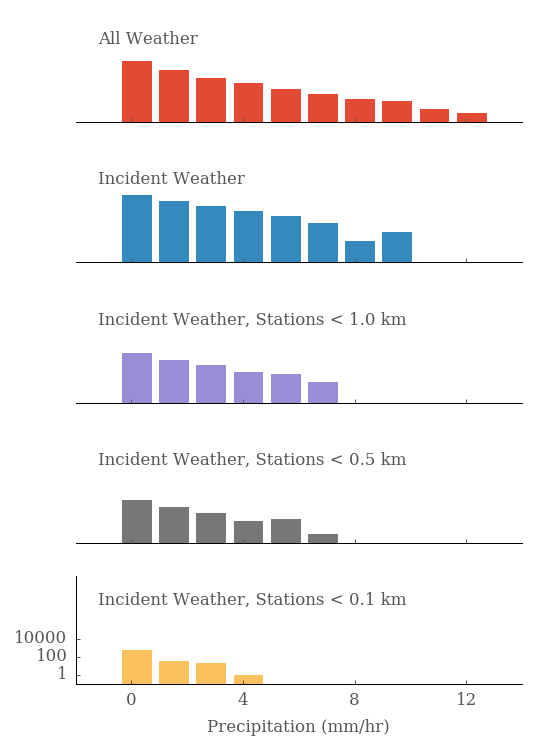

In [19]:
# Text
tags = [ 'All Weather', 'Incident Weather', \
         'Incident Weather, Stations < 1.0 km', \
         'Incident Weather, Stations < 0.5 km', \
         'Incident Weather, Stations < 0.1 km']

fig, axarr = plt.subplots(5,1)
fig.set_size_inches(4,6)

for iax in [ 0, 1, 2, 3, 4 ]:
    axarr[iax].bar(bin_cents, \
                   hist_list[iax], \
                   width=0.8*(np.diff(bin_cents)[0]), \
                   facecolor=cycle_colours[iax], linewidth=0.0)
    axarr[iax].text(0.05, 0.85, "%s" % tags[iax], \
                    ha='left', va='top', \
                    transform=axarr[iax].transAxes, \
                    fontsize='small', \
                    color='#555555')

for ax in axarr:
    ax.set_yscale('log')
    ax.set_xlim([-2,14])
    ax.set_ylim([0.1,1.0e11])

# Remove Spines (Left/Top/Right)
for ax in axarr.flatten():
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
#     ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0,4,8,12])
    
for ax in axarr.flatten()[:-1]:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.set_xticklabels(['','','',''])

axarr[-1].set_xlabel('Precipitation (mm/hr)')
axarr[-1].set_yticks([1,100,10000])
axarr[-1].set_yticklabels(['1','100','10000'])
    
fig.subplots_adjust(hspace=0.3)

# All Weather for Humidity Stations

In [20]:
# Now, let's check out the entire weather timeseries for these stations...
temperature_stations = \
    df_traffic[df_traffic.temperature_closest_weather_station_dxdy<0.1].temperature_closest_weather_station_id.unique()
temperature_stations = temperature_stations.astype(np.int64)

# df_obs_temp[df_obs_temp.station_id.isin(temperature_stations)]

In [21]:
# Build Histogram
data_list = \
    [ df_obs_temp.relative_humidity, \
      df_traffic[df_traffic.temperature_closest_weather_station_dxdy<0.1].relative_humidity, \
      df_obs_temp[df_obs_temp.station_id.isin(temperature_stations)].relative_humidity ]

for idata, data_loc in enumerate(data_list):
    data_list[idata] = data_loc[~np.isnan(data_loc)]

bin_edges = np.linspace(0,100,64)
bin_cents = (bin_edges[1:] + bin_edges[:-1]) / 2.0

hist_list = []
for idata, data_loc in enumerate(data_list):
    hist_loc, _ = np.histogram(data_loc, bins=bin_edges)
    hist_list.append(hist_loc)

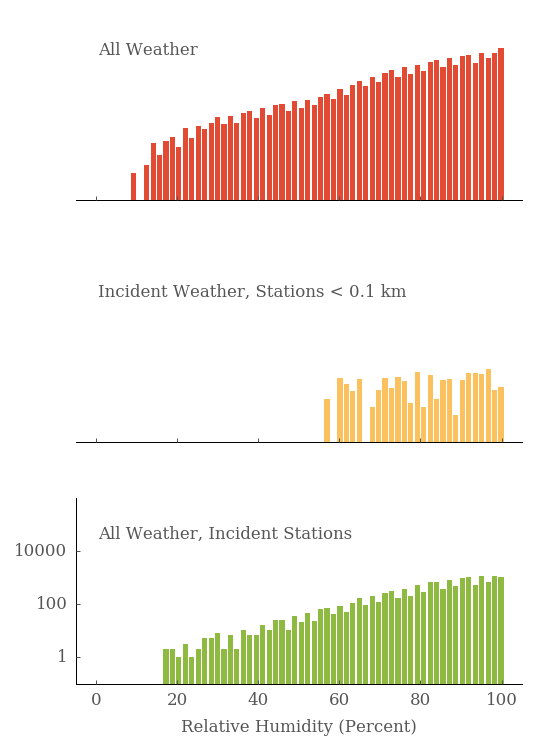

In [22]:
# Text
tags = [ 'All Weather', \
         'Incident Weather, Stations < 0.1 km', \
         'All Weather, Incident Stations']

fig, axarr = plt.subplots(3,1)
fig.set_size_inches(4,6)

icolor = [ 0, 4, 5 ]
for iax in [ 0, 1, 2 ]:
    axarr[iax].bar(bin_cents, \
                   hist_list[iax], \
                   width=0.8*(np.diff(bin_cents)[0]), \
                   facecolor=cycle_colours[icolor[iax]], linewidth=0.0)
    axarr[iax].text(0.05, 0.85, "%s" % tags[iax], \
                    ha='left', va='top', \
                    transform=axarr[iax].transAxes, \
                    fontsize='small', \
                    color='#555555')

# Rescale Axis, Set Limits
for ax in axarr:
    ax.set_yscale('log')
    ax.set_xlim([-5,105])
#     ax.set_ylim([1.0e-4,1.0e1])
    ax.set_ylim([0.1,1.0e6])

# Remove Spines (Left/Top/Right)
for ax in axarr.flatten():
    ax.spines['right'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
#     ax.set_yticks([])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0,20,40,60,80,100])
    
for ax in axarr.flatten()[:-1]:
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.set_xticklabels(['','','','','',''])

# Labels and Ticks
axarr[-1].set_xlabel('Relative Humidity (Percent)')
axarr[-1].set_yticks([1,100,10000])
axarr[-1].set_yticklabels(['1','100','10000'])
    
# Interplot Spacing
fig.subplots_adjust(hspace=0.3)

# fig.savefig('weather_only_for_stations_used_by_traffic.png')